In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [13]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [14]:
df1.shape

(13320, 9)

In [15]:
df1.groupby(df1.area_type)['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [57]:
df2 = df1.drop(['area_type','availability','society','balcony'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [58]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [59]:
df3 = df2.dropna()

In [60]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [61]:
df3.shape

(13246, 5)

In [62]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [63]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))

C:\Users\User\AppData\Local\Temp\ipykernel_13940\2773794992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))


In [64]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [65]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [66]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [67]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [68]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [69]:
def convert_sqft_to_num(x):
    token = str(x).split("-")
    if len(token) == 2:
        return ((float(token[0]) + float(token[1]))/2)
    try:
        return float(x)
    except:
        return None

In [71]:
df4 = df3.copy()

In [72]:
 df4['total_sqft'] =  df4['total_sqft'].apply(convert_sqft_to_num)

In [73]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [74]:
df5 = df4.copy()

In [75]:
df5['price_per_squre_feet'] = df5['price']*100000 / df5['total_sqft']

In [76]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_squre_feet
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [79]:
len(df5.location.unique())

1304

In [80]:
df5.location = df5.location.apply(lambda x: x.strip())

In [82]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending= False)

In [83]:
len(location_stats[location_stats<=10])

1052

In [84]:
locations_less_than_10 = location_stats[location_stats<=10]
locations_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [86]:
df5.location = df5.location.apply(lambda x : 'other' if x in locations_less_than_10 else x)

In [87]:
len(df5.location.unique())

242

In [89]:
##outlier detection and remove

In [90]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_squre_feet
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [91]:
df5[df5.total_sqft/df5.bhk<= 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_squre_feet
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [93]:
df5.shape

(13246, 7)

In [ ]:
##remove all the outliers,normal houes needs 300 squre feet for one room .remove all the one below that level.beacues the data is not good

In [102]:
df6 = df5[~(df5.total_sqft/df5.bhk<= 300)]

In [103]:
df6.shape

(12320, 7)

In [105]:
df6.price_per_squre_feet.describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_squre_feet, dtype: float64

In [110]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_squre_feet)
        st = np.std(subdf.price_per_squre_feet)
        reduced_df  = subdf[(subdf.price_per_squre_feet > (m-st)) & (subdf.price_per_squre_feet<=(m+st))]
        df_out  = pd.concat([df_out,reduced_df],ignore_index =True)
    return df_out

In [111]:
print(df6.columns)

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_squre_feet'],
      dtype='object')


In [112]:
df7 = remove_pps_outliers(df6)

In [114]:
df7.shape

(10016, 7)

In [115]:
## remove if same loaction,with similar size but price is higher in 2 bedroom homes than 3 bedrrom  mean price

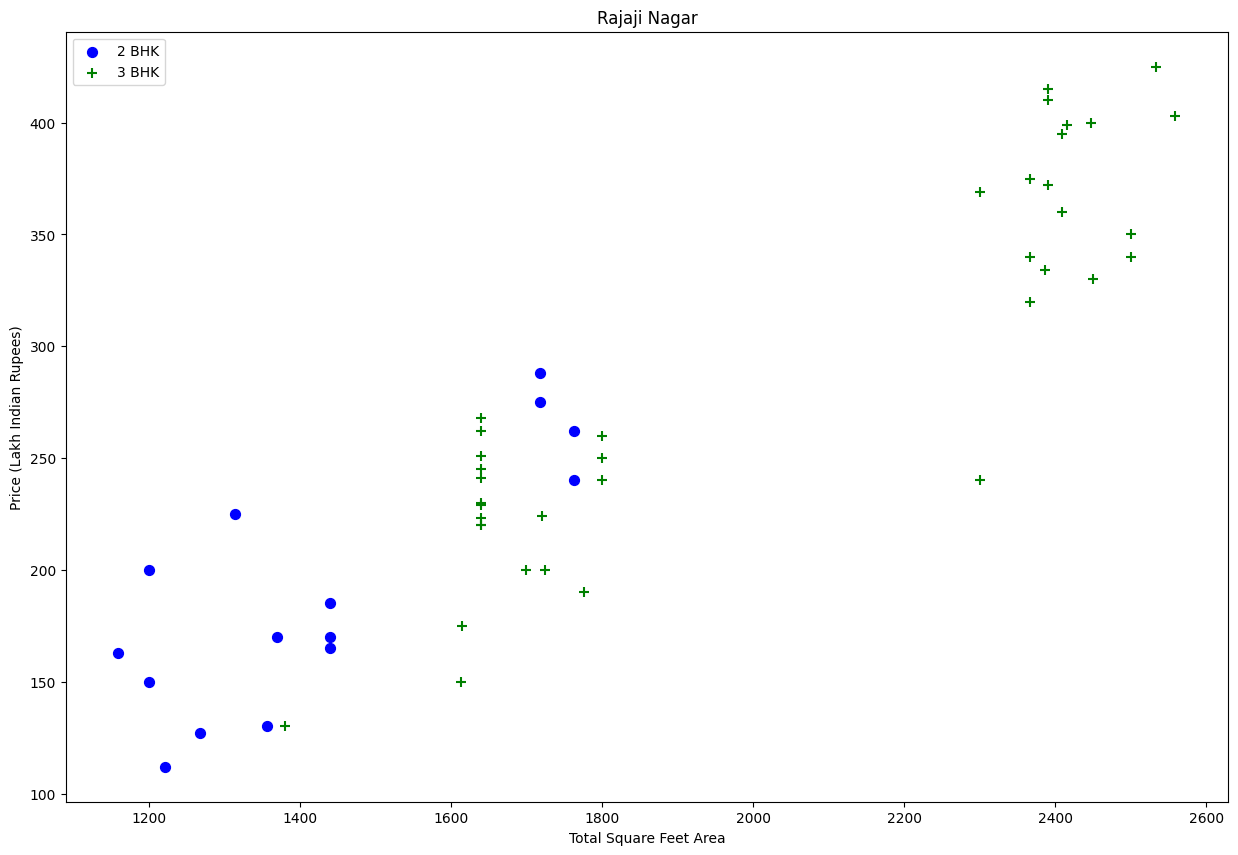

In [116]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

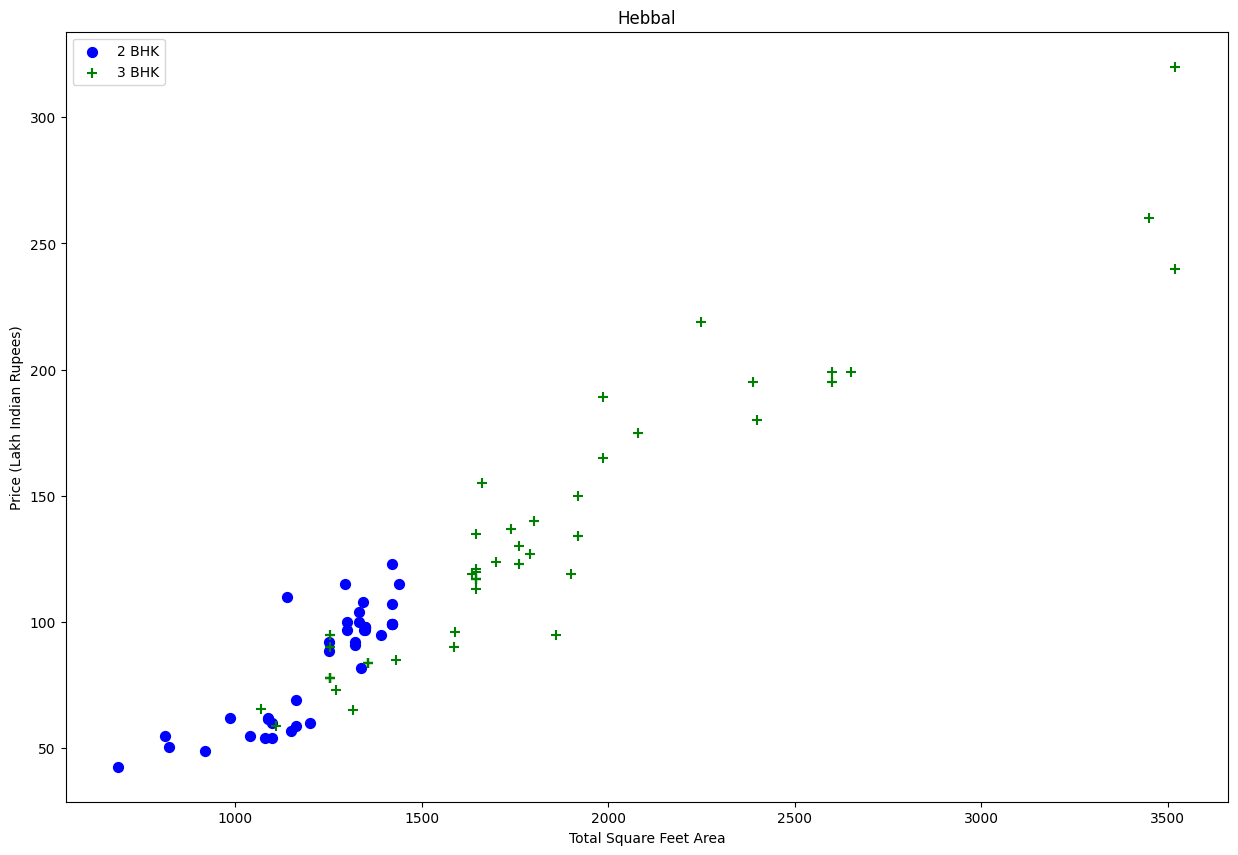

In [117]:
plot_scatter_chart(df7,"Hebbal")

In [118]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_squre_feet),
                'std': np.std(bhk_df.price_per_squre_feet),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_squre_feet<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7164, 7)

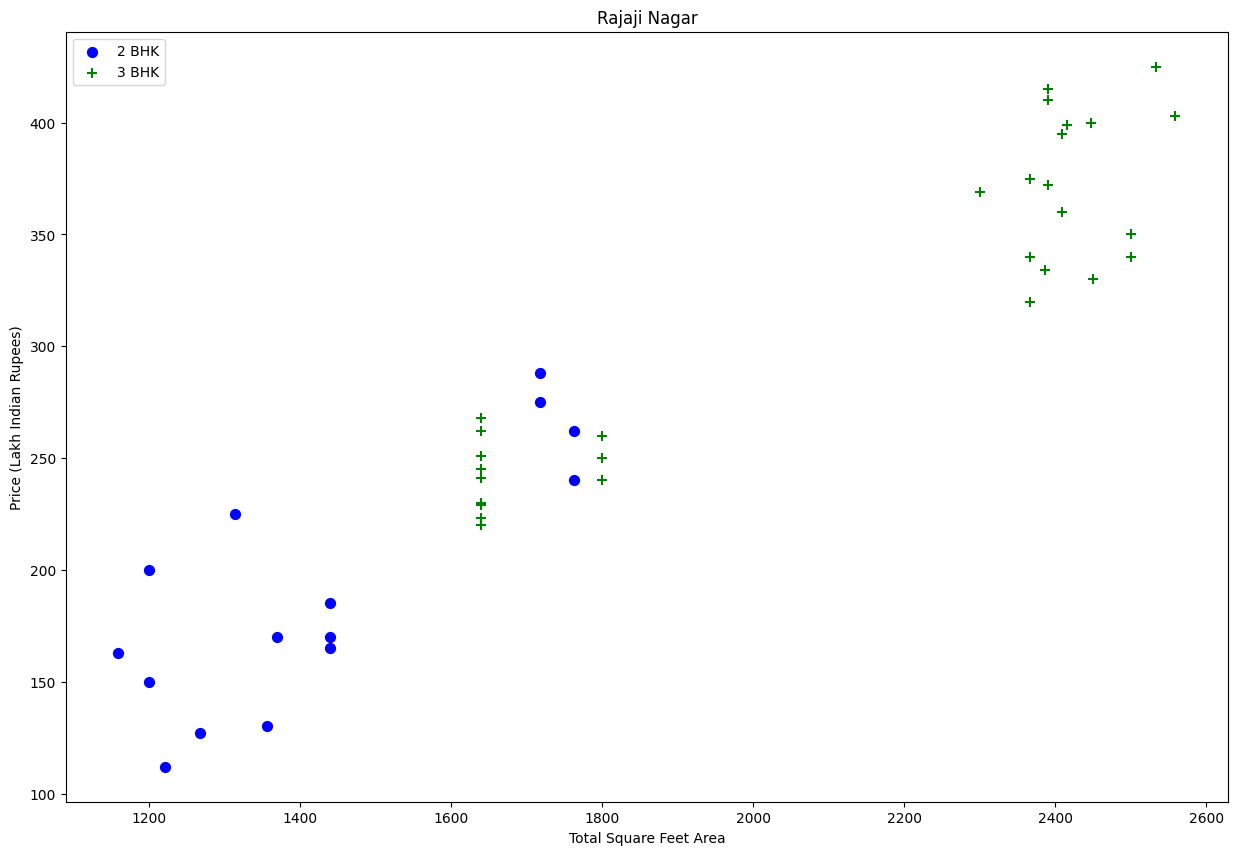

In [119]:
plot_scatter_chart(df8,"Rajaji Nagar")

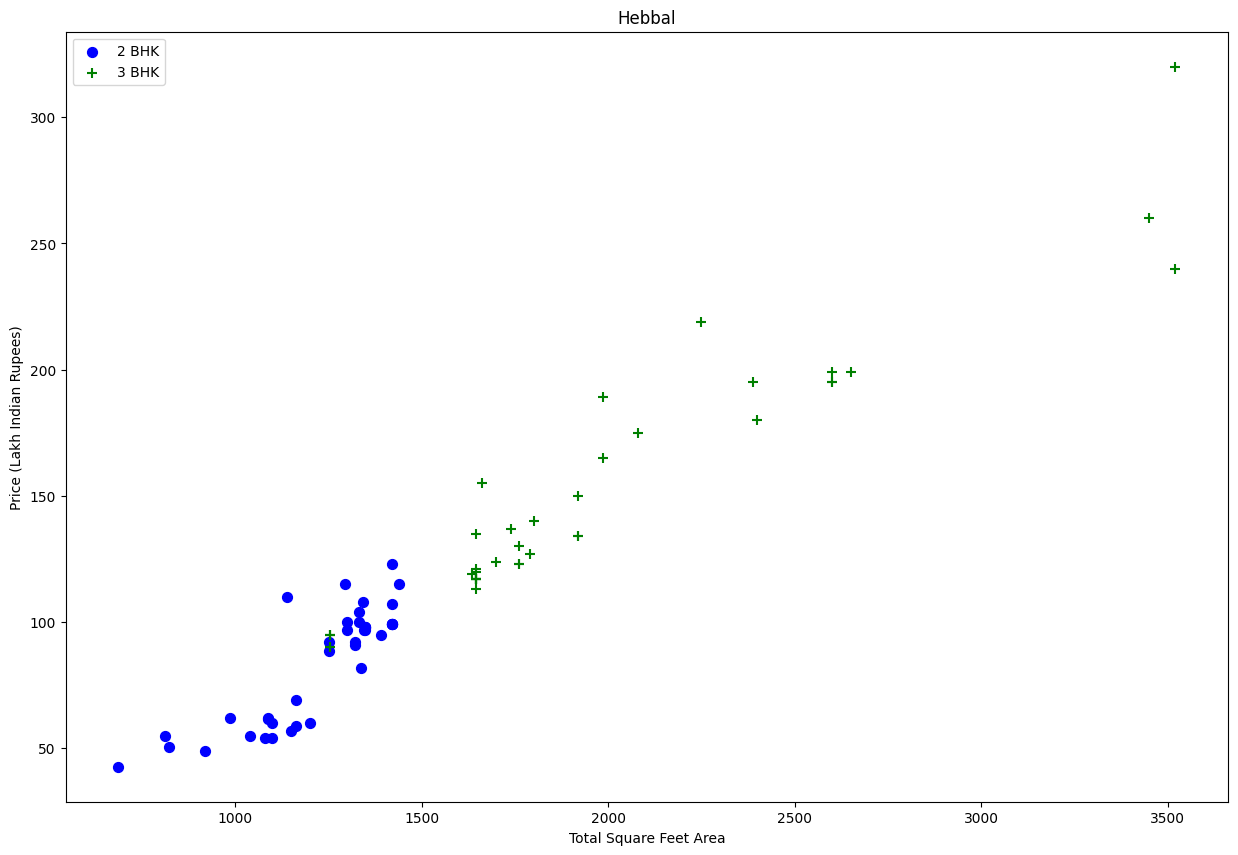

In [120]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

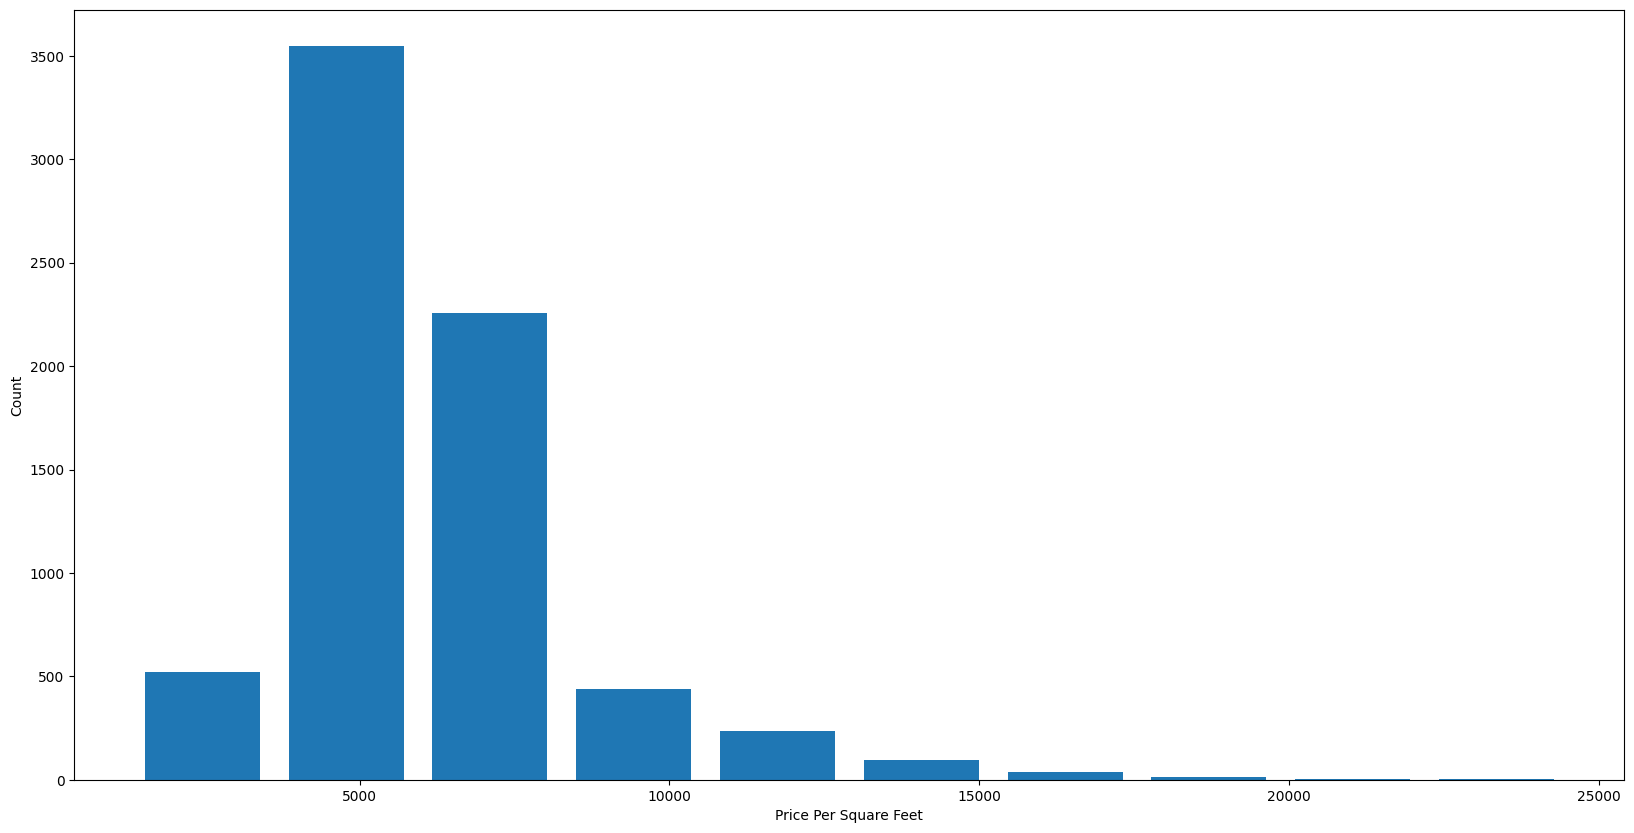

In [122]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_squre_feet,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [124]:
df8.bath.unique()

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [125]:
df8[df8.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_squre_feet
5138,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8307,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8392,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9106,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9431,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [ ]:
##bedroom +2 bathroom remove

Text(0, 0.5, 'count')

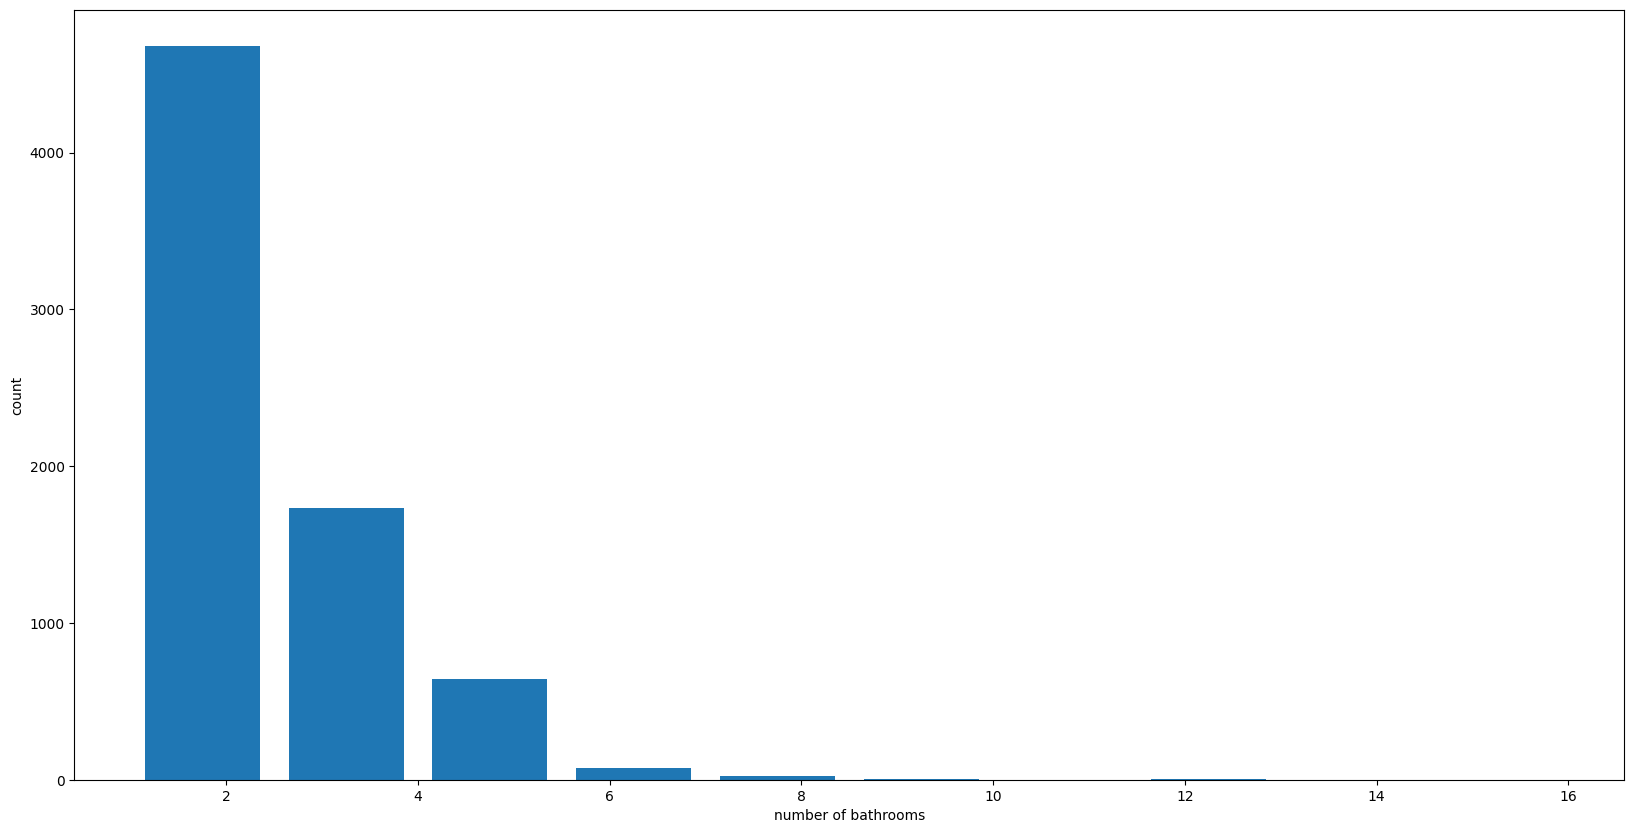

In [130]:
plt.hist(df8.bath,rwidth = 0.8)
plt.xlabel('number of bathrooms')
plt.ylabel('count')

In [131]:
df8[df8.bhk+2 < df8.bath]

,location,size,total_sqft,bath,price,bhk,price_per_squre_feet
1565,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5099,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6562,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8232,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [133]:
df9 = df8[df8.bhk+2 > df8.bath]

In [134]:
df9.shape

(7088, 7)

In [135]:
##model buliding

In [138]:
df10 = df9.drop(['size','price_per_squre_feet'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [142]:
dummies = pd.get_dummies(df10.location).astype(int)

In [143]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
df11 = pd.concat([df10,dummies.drop('other',axis= 'columns')],axis= 'columns')

In [145]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
df12 = df11.drop('location',axis=1)

In [147]:
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
df12.shape

(7088, 245)

In [150]:
x = df12.drop('price',axis= 1)
y = df12['price']

In [152]:
x.head(2)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [156]:
from sklearn.model_selection import train_test_split

In [162]:
x_train , x_test , y_train , y_test =  train_test_split(x,y,test_size= 0.2,random_state = 10)

In [163]:
from sklearn.linear_model import LinearRegression

In [164]:
from sklearn.ensemble import RandomForestRegressor

In [165]:
model1 = LinearRegression()

In [160]:
model2 = RandomForestRegressor()

In [166]:
model1.fit(x_train,y_train)

LinearRegression()

In [167]:
model1.predict(x_test)

array([ 54.52307488, 112.0995126 ,  95.80867252, ...,  91.30047746,
       146.01342731,  60.85302786])

In [169]:
model1.score(x_test,y_test)

0.8751466170466223

In [170]:
model2.fit(x_train,y_train)

RandomForestRegressor()

In [171]:
model2.predict(x_test)

array([ 79.77104167, 102.2618    ,  92.2786    , ...,  90.06863333,
       130.88416667,  53.74021429])

In [172]:
model2.score(x_test,y_test)

0.865548192396441

In [173]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [174]:
shuffle = ShuffleSplit(n_splits= 5,test_size=0.2,random_state=0)

In [175]:
cross_val_score(model1,x,y,cv = shuffle)

array([0.86195477, 0.86419585, 0.82068946, 0.82709117, 0.89136565])

In [182]:
cross_val_score(model2,x,y,cv = shuffle)

array([0.81500934, 0.86349926, 0.78886529, 0.8219735 , 0.86788756])

In [187]:
def predict_house_price(location,sqft,bath,bhk):
    
    x_input= np.zeros(len(x.columns))
    x_input[0] = sqft
    x_input[1] = bath
    x_input[2] = bhk

    if location in x.columns:
        loc_index = x.columns.get_loc(location)
        x_input[loc_index] = 1

    return model1.predict([x_input])[0]

In [188]:
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
